In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


import os


C:/Users/kashy/Downloads/archive/Temperature_And_Precipitation_Cities_IN\Bangalore_1990_2022_BangaloreCity.csv
C:/Users/kashy/Downloads/archive/Temperature_And_Precipitation_Cities_IN\Chennai_1990_2022_Madras.csv
C:/Users/kashy/Downloads/archive/Temperature_And_Precipitation_Cities_IN\Delhi_NCR_1990_2022_Safdarjung.csv
C:/Users/kashy/Downloads/archive/Temperature_And_Precipitation_Cities_IN\Lucknow_1990_2022.csv
C:/Users/kashy/Downloads/archive/Temperature_And_Precipitation_Cities_IN\Mumbai_1990_2022_Santacruz.csv
C:/Users/kashy/Downloads/archive/Temperature_And_Precipitation_Cities_IN\Rajasthan_1990_2022_Jodhpur.csv
C:/Users/kashy/Downloads/archive/Temperature_And_Precipitation_Cities_IN\Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326.csv


In [ ]:
# Import all the file at ones
for dirname, _, filenames in os.walk('C:/Users/kashy/Downloads/archive/Temperature_And_Precipitation_Cities_IN'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [146]:
# read the data
file_names = ['Lucknow_1990_2022', 'Delhi_NCR_1990_2022_Safdarjung','Chennai_1990_2022_Madras','Rajasthan_1990_2022_Jodhpur','Bangalore_1990_2022_BangaloreCity','Mumbai_1990_2022_Santacruz']
df_s = []
cities = []
for file_name in file_names:
    city = file_name.split('_')[0]
    cities.append(city)
    df_city = pd.read_csv(f"C:/Users/kashy/Downloads/archive/Temperature_And_Precipitation_Cities_IN/{file_name}.csv")
    df_city['city'] = city
    # fill in the missing values
    df_city['year']=df_city['time'].str.slice(6, 10).astype(int)
    df_city['month']=df_city['time'].str.slice(3, 5).astype(int)
    df_city['time2']=pd.to_datetime(df_city['time'])
    df_city2 = df_city.fillna(method="ffill").fillna(method="bfill")
    df_s.append(df_city2)
df_data = pd.concat(df_s)
# df_lko=pd.read_csv("/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Lucknow_1990_2022.csv")
# df_del=pd.read_csv("/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Delhi_NCR_1990_2022_Safdarjung.csv")
# df_data = pd.concat([df_lko, df_del])

In [147]:
df_data.head()

,time,tavg,tmin,tmax,prcp,city,year,month,time2
0,01-01-1990,7.2,1.8,18.1,0.0,Lucknow,1990,1,1990-01-01
1,02-01-1990,10.5,1.8,17.2,0.0,Lucknow,1990,1,1990-02-01
2,03-01-1990,10.2,1.8,18.6,0.0,Lucknow,1990,1,1990-03-01
3,04-01-1990,9.1,1.8,19.3,0.0,Lucknow,1990,1,1990-04-01
4,05-01-1990,13.5,1.8,23.8,0.0,Lucknow,1990,1,1990-05-01


In [177]:
df_data.shape

(71364, 9)

In [149]:
df_data.describe()

,tavg,tmin,tmax,prcp,year,month
count,71364.000000,71364.000000,71364.000000,71364.000000,71364.000000,71364.000000
mean,25.695325,20.674856,31.716161,3.360525,2005.786111,6.478056
std,4.841509,5.371907,4.685714,14.514629,9.402525,3.445140
min,5.700000,-0.600000,9.800000,0.000000,1990.000000,1.000000
25%,22.900000,18.100000,28.800000,0.000000,1998.000000,3.000000
50%,26.200000,20.900000,31.700000,0.000000,2006.000000,6.000000
75%,29.100000,24.800000,34.700000,0.000000,2014.000000,9.000000
max,39.800000,34.200000,48.100000,470.900000,2022.000000,12.000000


In [151]:
df_data.isnull().sum()

time     0
tavg     0
tmin     0
tmax     0
prcp     0
city     0
year     0
month    0
time2    0
dtype: int64

In [152]:
df_data['city']

0        Lucknow
1        Lucknow
2        Lucknow
3        Lucknow
4        Lucknow
          ...   
11889     Mumbai
11890     Mumbai
11891     Mumbai
11892     Mumbai
11893     Mumbai
Name: city, Length: 71364, dtype: object

In [153]:
df_data.sample()

,time,tavg,tmin,tmax,prcp,city,year,month,time2
11754,08-03-2022,24.9,18.0,30.6,0.0,Rajasthan,2022,3,2022-08-03


In [154]:
new_df = pd.get_dummies(df_data.city)
new_df

,Bangalore,Chennai,Delhi,Lucknow,Mumbai,Rajasthan
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
11889,0,0,0,0,1,0
11890,0,0,0,0,1,0
11891,0,0,0,0,1,0
11892,0,0,0,0,1,0


In [155]:
df_data.sample()

,time,tavg,tmin,tmax,prcp,city,year,month,time2
370,06-01-1991,22.3,15.2,29.2,0.0,Mumbai,1991,1,1991-06-01


In [156]:
new_df = pd.concat([df_data,new_df], axis='columns')
new_df

,time,tavg,tmin,tmax,prcp,city,year,month,time2,Bangalore,Chennai,Delhi,Lucknow,Mumbai,Rajasthan
0,01-01-1990,7.2,1.8,18.1,0.0,Lucknow,1990,1,1990-01-01,0,0,0,1,0,0
1,02-01-1990,10.5,1.8,17.2,0.0,Lucknow,1990,1,1990-02-01,0,0,0,1,0,0
2,03-01-1990,10.2,1.8,18.6,0.0,Lucknow,1990,1,1990-03-01,0,0,0,1,0,0
3,04-01-1990,9.1,1.8,19.3,0.0,Lucknow,1990,1,1990-04-01,0,0,0,1,0,0
4,05-01-1990,13.5,1.8,23.8,0.0,Lucknow,1990,1,1990-05-01,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11889,21-07-2022,27.6,25.6,30.5,10.9,Mumbai,2022,7,2022-07-21,0,0,0,0,1,0
11890,22-07-2022,28.3,26.0,30.5,3.0,Mumbai,2022,7,2022-07-22,0,0,0,0,1,0
11891,23-07-2022,28.2,25.8,31.3,5.1,Mumbai,2022,7,2022-07-23,0,0,0,0,1,0
11892,24-07-2022,28.1,25.6,30.4,7.1,Mumbai,2022,7,2022-07-24,0,0,0,0,1,0


In [157]:
new_df.isnull().sum()

time         0
tavg         0
tmin         0
tmax         0
prcp         0
city         0
year         0
month        0
time2        0
Bangalore    0
Chennai      0
Delhi        0
Lucknow      0
Mumbai       0
Rajasthan    0
dtype: int64

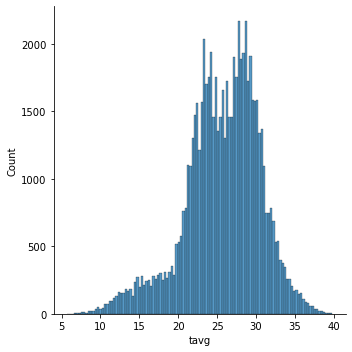

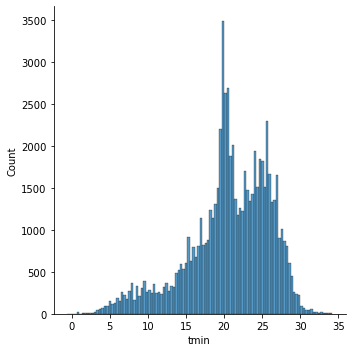

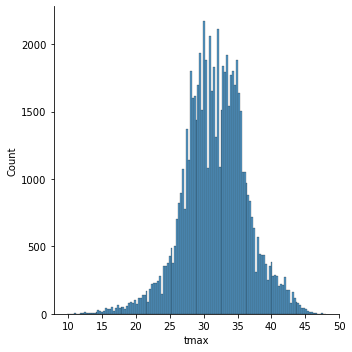

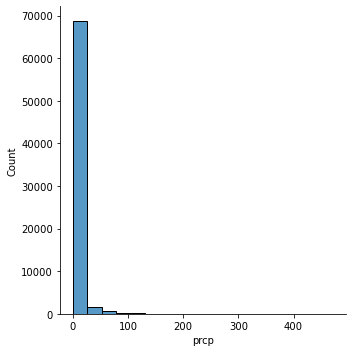

In [158]:
sns.displot(new_df.tavg)
sns.displot(new_df.tmin)
sns.displot(new_df.tmax)
sns.displot(new_df.prcp)

In [180]:
new_df

,time,tavg,tmin,tmax,prcp,city,year,month,time2,Bangalore,Chennai,Delhi,Lucknow,Mumbai,Rajasthan
0,631152000000000000,7.2,1.8,18.1,0.0,Lucknow,1990,1,1990-01-01,0,0,0,1,0,0
1,633830400000000000,10.5,1.8,17.2,0.0,Lucknow,1990,1,1990-02-01,0,0,0,1,0,0
2,636249600000000000,10.2,1.8,18.6,0.0,Lucknow,1990,1,1990-03-01,0,0,0,1,0,0
3,638928000000000000,9.1,1.8,19.3,0.0,Lucknow,1990,1,1990-04-01,0,0,0,1,0,0
4,641520000000000000,13.5,1.8,23.8,0.0,Lucknow,1990,1,1990-05-01,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11889,1658361600000000000,27.6,25.6,30.5,10.9,Mumbai,2022,7,2022-07-21,0,0,0,0,1,0
11890,1658448000000000000,28.3,26.0,30.5,3.0,Mumbai,2022,7,2022-07-22,0,0,0,0,1,0
11891,1658534400000000000,28.2,25.8,31.3,5.1,Mumbai,2022,7,2022-07-23,0,0,0,0,1,0
11892,1658620800000000000,28.1,25.6,30.4,7.1,Mumbai,2022,7,2022-07-24,0,0,0,0,1,0


In [181]:
new_df['time']=pd.to_datetime(new_df['time']).astype(np.int64)# /10**9

In [184]:
x=new_df.drop(['time2','city'], axis=1)
X=x.drop(['prcp'], axis=1)
X

,time,tavg,tmin,tmax,year,month,Bangalore,Chennai,Delhi,Lucknow,Mumbai,Rajasthan
0,631152000000000000,7.2,1.8,18.1,1990,1,0,0,0,1,0,0
1,633830400000000000,10.5,1.8,17.2,1990,1,0,0,0,1,0,0
2,636249600000000000,10.2,1.8,18.6,1990,1,0,0,0,1,0,0
3,638928000000000000,9.1,1.8,19.3,1990,1,0,0,0,1,0,0
4,641520000000000000,13.5,1.8,23.8,1990,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11889,1658361600000000000,27.6,25.6,30.5,2022,7,0,0,0,0,1,0
11890,1658448000000000000,28.3,26.0,30.5,2022,7,0,0,0,0,1,0
11891,1658534400000000000,28.2,25.8,31.3,2022,7,0,0,0,0,1,0
11892,1658620800000000000,28.1,25.6,30.4,2022,7,0,0,0,0,1,0


In [165]:
y=new_df.iloc[:,4]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: prcp, dtype: float64

In [166]:
output_temp = new_df.prcp.value_counts()
output_temp.head(80)

0.0     54955
0.3      1296
0.5      1295
1.0      1249
2.0      1028
        ...  
46.0       31
10.7       30
49.0       30
11.2       29
55.9       28
Name: prcp, Length: 80, dtype: int64

In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.27,random_state=42)

In [168]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=42)
model2=model.fit(X,y)

In [169]:
score_train=model2.score(X_train,y_train)
score_test=model2.score(X_test,y_test)
print(score_train,score_test)

1.0 1.0


In [170]:
from sklearn import metrics
prediction=model2.predict(X_test)

print("Model score is - ",model2.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,prediction ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Model score is -  1.0
Mean Absolute Error: 8.582060279096843e-18
Mean Squared Error: 9.23267766948293e-32
Root Mean Squared Error: 3.0385321570592156e-16


C:\Users\kashy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


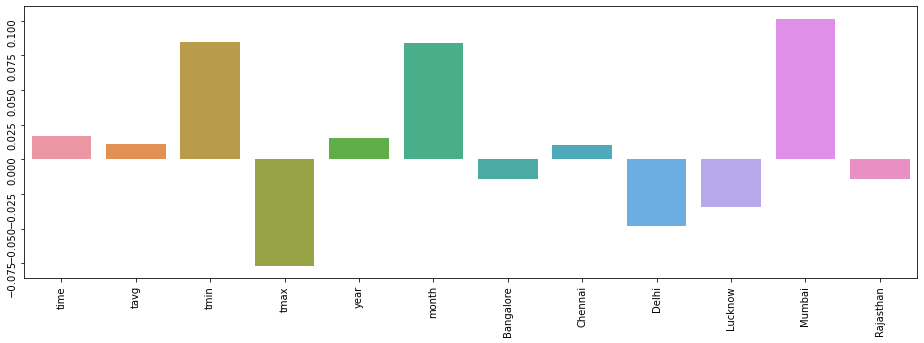

In [171]:
# visualize correlation barplot
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
ax = sns.barplot(X.corrwith(new_df.prcp).index, X.corrwith(new_df.prcp))
ax.tick_params(labelrotation = 90)

In [185]:
from sklearn.cluster import KMeans
sse = []

k_range = range(1,10)
for i in k_range:
    kms = KMeans(n_clusters=i)
    kms.fit(x)
    sse.append(kms.inertia_)

In [186]:
sse

[6.283598887662534e+39,
 1.5717296158549008e+39,
 6.989353110435313e+38,
 3.9335208229721756e+38,
 2.518679222481692e+38,
 1.7501246271805878e+38,
 1.286869802507564e+38,
 9.855933251277081e+37,
 7.792988758596385e+37]

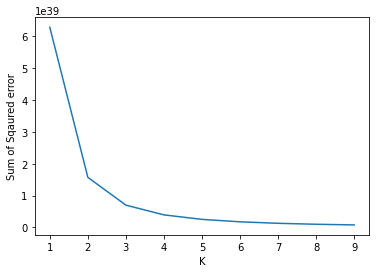

In [187]:
plt.xlabel('K')
plt.ylabel('Sum of Sqaured error')
plt.plot(k_range,sse)
plt.show()

In [210]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(x)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [211]:
xx = x

In [212]:
xx['new_col'] = range(1, len(xx) + 1)

In [231]:
xx['cluster'] = y_pred
xx.tail()

,time,tavg,tmin,tmax,prcp,year,month,Bangalore,Chennai,Delhi,Lucknow,Mumbai,Rajasthan,cluster,new_col
11889,1658361600000000000,27.6,25.6,30.5,10.9,2022,7,0,0,0,0,1,0,0,71360
11890,1658448000000000000,28.3,26.0,30.5,3.0,2022,7,0,0,0,0,1,0,0,71361
11891,1658534400000000000,28.2,25.8,31.3,5.1,2022,7,0,0,0,0,1,0,0,71362
11892,1658620800000000000,28.1,25.6,30.4,7.1,2022,7,0,0,0,0,1,0,0,71363
11893,1658707200000000000,28.3,25.1,30.2,7.1,2022,7,0,0,0,0,1,0,0,71364


In [214]:
xx['cluster'].value_counts()

1    23862
2    23772
0    23730
Name: cluster, dtype: int64

In [216]:
df1 = xx[xx.cluster==0]
df2 = xx[xx.cluster==1]
df3 = xx[xx.cluster==2]


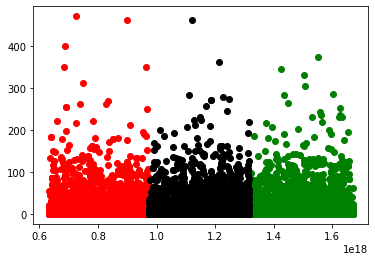

In [230]:
plt.scatter(df1.time, df1['prcp'], color='green')
plt.scatter(df2.time, df2['prcp'], color='red')
plt.scatter(df3.time, df3['prcp'], color='black')
